# Data collection

In this notebook you will get to know different ways in which you can collect data about brands that you want to get information about. This might be your own brand or brands that are owned by competitors. In this case it is important to evaluate which information you collect and where you are getting it from. The idea is to give you some guidance on where you can look for information, but you are always free to gather data in other ways.

## 1. Web search

The most obvious way to gather data is by conducting a naive web search looking for articles, forums, videos that talk about your brand. This way you migth get a general idea of the sentiment but it depends on which sources you find and what predispositions might be present.

## 2. Google Trends

Google Trends provides you with data about the relevance of terms that were searched for on Google. You can us it to gather time series data, but make sure to understand what the data entails (what is acutally depcited in the graphs). Google Trends lets you download the information as .csv-file making it easy to incorporate it in data analysis projects.

## 3. APIs

APIs are a way to send requests for information directly to another program that has access to a data bank. You can get information from the data bank by sending a request to the API. The output will be most likely a .JSON-file which includes different layers that can hold information of various types.

### Example: Querry an API using Python

Usually you install and load all packages at the start of your code, but for educational purposes packages will be installed and loaded right at the spot where they are being used so you get an idea of which package is supposed to do what.

You cann uncomment the os.system(...) lines in order to install the packages required to run the code.

In [213]:
# package to access the command line directly from Python
import os

# os.chdir("")  # set your working directory here

# check
os.getcwd()

'/Users/felixwang/Developer/DiMa2025Group11'

In [214]:
#os.system("pip install requests")

import requests

# access the NewsAPI using your won API-key which you can get here: https://newsapi.org/
# documentation can be found here: https://newsapi.org/docs/get-started
# you can set arguments in the link
# here we are looking for news articles about Pokémon in English
res_1 = requests.get("https://newsapi.org/v2/everything?q=GTA6&language=en&apiKey=3e7b5863a9a045cfb1bc3da6fdc436f0")

In [215]:
# check whether your request was successful (code: 200)
res_1.status_code

200

In [216]:
# check what you got
res_1.content[:100]

b'{"status":"ok","totalResults":35,"articles":[{"source":{"id":null,"name":"GameSpot"},"author":"Eddie'

In [217]:
# transform the result to a dictionary so it is easier to work with
res_1_dict = res_1.json()
res_1_dict.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [218]:
# check the first article of the results
res_1_dict["articles"]

[{'source': {'id': None, 'name': 'GameSpot'},
  'author': 'Eddie Makuch',
  'title': "GTA 6's Jason Is Not Voiced By This Popular Batman Actor",
  'description': "Following the debut of the new GTA 6 trailer, fans have plenty of lingering questions, including who is voicing the main characters Jason and Lucia. We don't know for sure, but now one veteran and prolific voice actor, Roger Craig Smith, has confirmed he's no…",
  'url': 'https://www.gamespot.com/articles/gta-6s-jason-is-not-voiced-by-this-popular-batman-actor/1100-6531366/',
  'urlToImage': 'https://www.gamespot.com/a/uploads/screen_kubrick/1179/11799911/4490111-screenshot2025-05-07at11.02.47am.png',
  'publishedAt': '2025-05-07T14:35:00Z',
  'content': "Following the debut of the new GTA 6 trailer, fans have plenty of lingering questions, including who is voicing the main characters Jason and Lucia. We don't know for sure, but now one veteran and pr… [+1517 chars]"},
 {'source': {'id': None, 'name': 'Livedoor.biz'},
  'auth

In [219]:
# check which variable you got
res_1_dict["articles"][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [220]:
# you can get a list of the titles of all articles
# set an empty list
article_titles = []

# fill the list with the title of every article
for i in range(len(res_1_dict["articles"])):
    article_titles.append(res_1_dict["articles"][i]["title"])

# print out the first 10 article titles
article_titles[:35]

["GTA 6's Jason Is Not Voiced By This Popular Batman Actor",
 '【画像】GTA6のスタッフ、女さんだらけだった……',
 '【動画あり】最新のスパイカメラ、ついに糸になるｗｗｗｗｗｗｗｗｗｗ',
 '【悲報】アイドルグループのお見送り会でオタクを剥がすスタッフｗｗｗｗｗｗｗｗｗｗｗｗｗｗ',
 '【動画あり】米軍女性、配属ガチャで日本に決まった結果ｗｗｗｗｗｗｗ',
 '【動画あり】激ヤバ煽り運転軽おじさん、逮捕されるｗｗｗｗｗｗｗｗｗｗ',
 '【動画あり】新宿、ベロチュー手●キが大人気',
 '【悲報】Firefox、消滅の危機かｗｗｗｗｗｗｗｗｗｗ',
 '【悲報】Z世代「これだけAIが発展したのに人間が勉強する必要あるんですか？」',
 '【動画あり】珍走、言葉通りの意味に成り果てるｗｗｗｗｗｗｗｗｗｗｗｗｗ',
 '【朗報】GTA6の発売日、5月26日に決定',
 'GTA 6 got a second trailer with more screen time for both of its protagonists just in time for all of us to numb the pain of it being delayed',
 'Today’s NYT Mini Crossword Clues And Answers For Monday, May 5th',
 'Rockstar Shares Second Grand Theft Auto 6 Trailer And New Game Details',
 "'You can't escape us': Devolver plots to release a game on GTA 6's release date, no matter when that is",
 'Jason Duval Undercover Cop Theory Becomes Viral Topic Among GTA VI Fans On Twitter And Reddit',
 "GTA VI Trailer 2 Makes Fans Thirst Over 'Shirtless Jason' Scene While Showing O

In [221]:
# you can do the same for the descriptions
article_descriptions = []

for i in range(len(res_1_dict["articles"])):
    article_descriptions.append(res_1_dict["articles"][i]["description"])

article_descriptions[:35]

["Following the debut of the new GTA 6 trailer, fans have plenty of lingering questions, including who is voicing the main characters Jason and Lucia. We don't know for sure, but now one veteran and prolific voice actor, Roger Craig Smith, has confirmed he's no…",
 '1: 以下、ニュー速クオリティでお送りします  2024/11/23(土) 18:44:00.79 ID:FvlxuHJZ0  これからは女性の時代らしい  https://pbs.twimg.com/media/GdA4gSqXkAE7naa?format=jpg&name=large  引用元: ・https://nova.5ch.net/test/read.cgi/livegalileo/1732355040/',
 '1: それでも動く名無し 2025/05/09(金) 23:27:55.38 ID:2R7ffq4k0\n https://video.twimg.com/ext_tw_video/1864633968454455300/pu/vid/avc1/720x1280/JyH0XRyLsO4Tnt5z.mp4 \n\n5: それでも動く名無し 2025/05/09(金) 23:29:48.86 ID:MegWIguq0\n 中国はカンニ...',
 '1: それでも動く名無し  2025/05/12(月) 06:55:56.03 ID:0TMPzZja0\u3000  https://video.twimg.com/amplify_video/1921423013943070720/vid/avc1/370x608/yJKtD4JTJVZNYqMG.mp4?tag=14    https://video.twimg.com/amplify_video/1921497845603106816/vid/avc1/720x1170/N8',
 '1: 以下、5ちゃんねるからVIPがお送りします 2025/05/11(日) 00:32

In [222]:
# and the sources
article_sources = []

for i in range(len(res_1_dict["articles"])):
    article_sources.append(res_1_dict["articles"][i]["source"]["name"])

article_sources[:10]

['GameSpot',
 'Livedoor.biz',
 'Himasoku.com',
 'Himasoku.com',
 'Himasoku.com',
 'Himasoku.com',
 'Himasoku.com',
 'Himasoku.com',
 'Himasoku.com',
 'Himasoku.com']

In [223]:
# and the authors
article_authors = []

for i in range(len(res_1_dict["articles"])):
    article_authors.append(res_1_dict["articles"][i]["author"])

article_authors[:10]

['Eddie Makuch',
 'news4vip2',
 'himasoku123',
 'himasoku123',
 'himasoku123',
 'himasoku123',
 'himasoku123',
 'himasoku123',
 'himasoku123',
 'himasoku123']

In [224]:
# and the publication dates
article_date = []

for i in range(len(res_1_dict["articles"])):
    article_date.append(res_1_dict["articles"][i]["publishedAt"])

article_date[:10]

['2025-05-07T14:35:00Z',
 '2025-04-17T10:45:01Z',
 '2025-05-10T01:45:32Z',
 '2025-05-12T03:45:39Z',
 '2025-05-11T02:25:35Z',
 '2025-05-10T03:25:05Z',
 '2025-05-10T14:45:36Z',
 '2025-05-10T11:25:44Z',
 '2025-05-10T11:45:19Z',
 '2025-05-09T12:25:28Z']

Now we can use the lists that we got to build a dataframe.

In [225]:
#os.system("pip install pandas")

import pandas as pd

# create a dictionary from the lists that we got so far, then we can create a dataframe from that
pokemon_data = pd.DataFrame({
    "title": article_titles,
    "description": article_descriptions,
    "source": article_sources,
    "authors": article_authors,
    "date": article_date
})

# convert the dictionary to a dataframe
pokemon_data = pd.DataFrame(pokemon_data)

# check the result
pokemon_data

,title,description,source,authors,date
0,GTA 6's Jason Is Not Voiced By This Popular Ba...,"Following the debut of the new GTA 6 trailer, ...",GameSpot,Eddie Makuch,2025-05-07T14:35:00Z
1,【画像】GTA6のスタッフ、女さんだらけだった……,1: 以下、ニュー速クオリティでお送りします 2024/11/23(土) 18:44:00...,Livedoor.biz,news4vip2,2025-04-17T10:45:01Z
2,【動画あり】最新のスパイカメラ、ついに糸になるｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/09(金) 23:27:55.38 ID:2R7f...,Himasoku.com,himasoku123,2025-05-10T01:45:32Z
3,【悲報】アイドルグループのお見送り会でオタクを剥がすスタッフｗｗｗｗｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/12(月) 06:55:56.03 ID:0TM...,Himasoku.com,himasoku123,2025-05-12T03:45:39Z
4,【動画あり】米軍女性、配属ガチャで日本に決まった結果ｗｗｗｗｗｗｗ,1: 以下、5ちゃんねるからVIPがお送りします 2025/05/11(日) 00:32:2...,Himasoku.com,himasoku123,2025-05-11T02:25:35Z
5,【動画あり】激ヤバ煽り運転軽おじさん、逮捕されるｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/10(土) 05:17:29.32 ID:DtE...,Himasoku.com,himasoku123,2025-05-10T03:25:05Z
6,【動画あり】新宿、ベロチュー手●キが大人気,1: それでも動く名無し 2025/05/08(木) 00:28:16.38 ID:krZv...,Himasoku.com,himasoku123,2025-05-10T14:45:36Z
7,【悲報】Firefox、消滅の危機かｗｗｗｗｗｗｗｗｗｗ,1: 3K宇宙背景放射(やわらか銀行) [TW] 2025/05/10(土) 14:26:5...,Himasoku.com,himasoku123,2025-05-10T11:25:44Z
8,【悲報】Z世代「これだけAIが発展したのに人間が勉強する必要あるんですか？」,1: それでも動く名無し 2025/05/10(土) 00:22:51.43 ID:M5Hi...,Himasoku.com,himasoku123,2025-05-10T11:45:19Z
9,【動画あり】珍走、言葉通りの意味に成り果てるｗｗｗｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/09(金) 16:13:19.60 ID:2R7...,Himasoku.com,himasoku123,2025-05-09T12:25:28Z


## 4. Web Scraping

Try to always use an API if one is available. If not and the robots.txt (which can be accessed by <website-link>/robots.txt does allow web scraping, you may scrape the information. However, do not send to many requests at once, as the website that your are scraping might block you if you bring too much traffic.

In [226]:
#os.system("pip install bs4")

# package to work with scraped data
from bs4 import BeautifulSoup

# scrape a website
res_2 = requests.get("https://wikipedia.org/wiki/GTA6")

In [227]:
# check whether it worked
res_2.ok

True

In [228]:
# make the result readable, we use the html-parser here because the website is written in html
soup = BeautifulSoup(res_2.text, "html.parser")

In [229]:
# using h1 you can see on of the headers
soup.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading"><i>Grand Theft Auto VI</i></h1>

In [230]:
# adding .text lets you see just the content of the first header
soup.h1.text

'Grand Theft Auto VI'

In [231]:
# with this command you can get all the text from the text blocks
#for text_block in soup.find_all("p"):
#    print(text_block.text)

In [232]:
# create a string of the text by creating an empty list and filling it with text block after text block
pokemon_text = []

for text_block in soup.find_all("p"):
    pokemon_text.append(text_block.text)

pokemon_text[:5]

['\n',
 'Grand Theft Auto VI is an upcoming action-adventure game developed and published by Rockstar Games. It is due to be the eighth main Grand Theft Auto game, following Grand Theft Auto V (2013), and the sixteenth entry overall. Set within an open world—the fictional U.S. state of Leonida, based on Florida, and its Miami-inspired Vice City—the story follows the criminal duo of Jason Duval and Lucia Caminos.\n',
 'Following years of speculation and anticipation, Rockstar confirmed in February 2022 that the game was in development. That September, footage from unfinished versions was leaked on the internet in what journalists described as one of the biggest leaks in the history of the video game industry. The game was formally revealed in December 2023 and is scheduled to be released on 26\xa0May 2026 for the PlayStation 5 and Xbox Series\xa0X/S.\n',
 'Grand Theft Auto VI is an action-adventure game set within an open world.[1][2] Its fictional U.S. state of Leonida—based on Florida

In [233]:
# now you join each text block in the list together to get one string of text
pokemon_text_whole = " ".join(pokemon_text)

# print out the first 500 signs to check the result (500 is an arbitrary number in this case)
pokemon_text_whole[:500]

'\n Grand Theft Auto VI is an upcoming action-adventure game developed and published by Rockstar Games. It is due to be the eighth main Grand Theft Auto game, following Grand Theft Auto V (2013), and the sixteenth entry overall. Set within an open world—the fictional U.S. state of Leonida, based on Florida, and its Miami-inspired Vice City—the story follows the criminal duo of Jason Duval and Lucia Caminos.\n Following years of speculation and anticipation, Rockstar confirmed in February 2022 that '

# Data Analysis

After collecting the data, we need to analyze it. This can be done manually by going through the material and getting a feel for what topics are important or what sentiments are present. Since we already collected data automatically, going through everything manually will probably be the last option. We are going to apply some techniques from the area of Natural Language Processing to get a feel for the data that we collected. Of course you are free to use whatever techniques you seem fit for the data that you collected.

In [234]:
#os.system("pip install nltk")

# packages to do some natural langauge processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("all")  # this downloads some data and must only be done once

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/felixwang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nl

True

In [235]:
# create helper-functions to preprocess the sentences for text analysis
# the first function splits the sentences into words so we can preprocess each word
def create_tokens(text):
    tokens = word_tokenize(text.lower())

    return tokens


# the second function removes very common words in the english language that we do not need in our analysis as they appear in every english sentence
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords.words("english")]

    return filtered_tokens


# the third function gives us word stems so we do not differentiate between the singular and the plural of a word
def stemming(filtered_tokens):
    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return lemmatized_tokens


# the last function creates sentences again out of the individual words
def build_sentences(lemmatized_tokens):
    processed_text = " ".join(lemmatized_tokens)

    return processed_text


In [236]:
# example 
example_sentence = "My therapist told me to do some self-reflection so I decided on buying bigger mirrors."

example_tokens = create_tokens(example_sentence)
print(example_tokens)

['my', 'therapist', 'told', 'me', 'to', 'do', 'some', 'self-reflection', 'so', 'i', 'decided', 'on', 'buying', 'bigger', 'mirrors', '.']


In [237]:
example_filtered_tokens = remove_stopwords(example_tokens)
print(example_filtered_tokens)

['therapist', 'told', 'self-reflection', 'decided', 'buying', 'bigger', 'mirrors', '.']


In [238]:
example_lemmatized_tokens = stemming(example_filtered_tokens)
print(example_lemmatized_tokens)

['therapist', 'told', 'self-reflection', 'decided', 'buying', 'bigger', 'mirror', '.']


In [239]:
example_processed_text = build_sentences(example_lemmatized_tokens)
print(example_processed_text)

therapist told self-reflection decided buying bigger mirror .


In [240]:
# function that does all preprocessing steps in sequence
def preprocess_text(text):
    preprocessed_text = build_sentences(stemming(remove_stopwords(create_tokens(text))))

    return preprocessed_text

# test
print(preprocess_text(example_sentence))

therapist told self-reflection decided buying bigger mirror .


In [241]:
# now apply the functions to the titles in our dataset
pokemon_data["title_preprocessed"] = pokemon_data["title"].apply(preprocess_text)

pokemon_data["title_preprocessed"]

0            gta 6 's jason voiced popular batman actor
1                             【画像】gta6のスタッフ、女さんだらけだった……
2                     【動画あり】最新のスパイカメラ、ついに糸になるｗｗｗｗｗｗｗｗｗｗ
3          【悲報】アイドルグループのお見送り会でオタクを剥がすスタッフｗｗｗｗｗｗｗｗｗｗｗｗｗｗ
4                     【動画あり】米軍女性、配属ガチャで日本に決まった結果ｗｗｗｗｗｗｗ
5                    【動画あり】激ヤバ煽り運転軽おじさん、逮捕されるｗｗｗｗｗｗｗｗｗｗ
6                                 【動画あり】新宿、ベロチュー手●キが大人気
7                          【悲報】firefox、消滅の危機かｗｗｗｗｗｗｗｗｗｗ
8                【悲報】z世代「これだけaiが発展したのに人間が勉強する必要あるんですか？」
9                   【動画あり】珍走、言葉通りの意味に成り果てるｗｗｗｗｗｗｗｗｗｗｗｗｗ
10                                【朗報】gta6の発売日、5月26日に決定
11    gta 6 got second trailer screen time protagoni...
12    today ’ nyt mini crossword clue answer monday ...
13    rockstar share second grand theft auto 6 trail...
14    'you ca n't escape u ' : devolver plot release...
15    jason duval undercover cop theory becomes vira...
16    gta vi trailer 2 make fan thirst 'shirtless ja...
17    rockstar released way ‘ gta 6 ’ story deta

## Sentiment Analysis

In [242]:
# sentiment analyzer (pretrained model in the NLTK-library)
analyzer = SentimentIntensityAnalyzer()

# create a function to return sentiment scores
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    #max_score = max(scores, key = scores.get)
    #sentiment_pos = 1 if scores["pos"] > 0 else 0
    sentiment = 1 if scores["neg"] > 0 else 0

    return sentiment

# using .apply we can apply the function to every row in the dataset so every title in the data gets a score
pokemon_data["title_sentiment"] = pokemon_data["title_preprocessed"].apply(get_sentiment)
pokemon_data["title_sentiment"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    1
20    1
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    1
29    0
30    1
31    0
32    0
33    1
34    0
Name: title_sentiment, dtype: int64

In [243]:
# check the result
pokemon_data

,title,description,source,authors,date,title_preprocessed,title_sentiment
0,GTA 6's Jason Is Not Voiced By This Popular Ba...,"Following the debut of the new GTA 6 trailer, ...",GameSpot,Eddie Makuch,2025-05-07T14:35:00Z,gta 6 's jason voiced popular batman actor,0
1,【画像】GTA6のスタッフ、女さんだらけだった……,1: 以下、ニュー速クオリティでお送りします 2024/11/23(土) 18:44:00...,Livedoor.biz,news4vip2,2025-04-17T10:45:01Z,【画像】gta6のスタッフ、女さんだらけだった……,0
2,【動画あり】最新のスパイカメラ、ついに糸になるｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/09(金) 23:27:55.38 ID:2R7f...,Himasoku.com,himasoku123,2025-05-10T01:45:32Z,【動画あり】最新のスパイカメラ、ついに糸になるｗｗｗｗｗｗｗｗｗｗ,0
3,【悲報】アイドルグループのお見送り会でオタクを剥がすスタッフｗｗｗｗｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/12(月) 06:55:56.03 ID:0TM...,Himasoku.com,himasoku123,2025-05-12T03:45:39Z,【悲報】アイドルグループのお見送り会でオタクを剥がすスタッフｗｗｗｗｗｗｗｗｗｗｗｗｗｗ,0
4,【動画あり】米軍女性、配属ガチャで日本に決まった結果ｗｗｗｗｗｗｗ,1: 以下、5ちゃんねるからVIPがお送りします 2025/05/11(日) 00:32:2...,Himasoku.com,himasoku123,2025-05-11T02:25:35Z,【動画あり】米軍女性、配属ガチャで日本に決まった結果ｗｗｗｗｗｗｗ,0
5,【動画あり】激ヤバ煽り運転軽おじさん、逮捕されるｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/10(土) 05:17:29.32 ID:DtE...,Himasoku.com,himasoku123,2025-05-10T03:25:05Z,【動画あり】激ヤバ煽り運転軽おじさん、逮捕されるｗｗｗｗｗｗｗｗｗｗ,0
6,【動画あり】新宿、ベロチュー手●キが大人気,1: それでも動く名無し 2025/05/08(木) 00:28:16.38 ID:krZv...,Himasoku.com,himasoku123,2025-05-10T14:45:36Z,【動画あり】新宿、ベロチュー手●キが大人気,0
7,【悲報】Firefox、消滅の危機かｗｗｗｗｗｗｗｗｗｗ,1: 3K宇宙背景放射(やわらか銀行) [TW] 2025/05/10(土) 14:26:5...,Himasoku.com,himasoku123,2025-05-10T11:25:44Z,【悲報】firefox、消滅の危機かｗｗｗｗｗｗｗｗｗｗ,0
8,【悲報】Z世代「これだけAIが発展したのに人間が勉強する必要あるんですか？」,1: それでも動く名無し 2025/05/10(土) 00:22:51.43 ID:M5Hi...,Himasoku.com,himasoku123,2025-05-10T11:45:19Z,【悲報】z世代「これだけaiが発展したのに人間が勉強する必要あるんですか？」,0
9,【動画あり】珍走、言葉通りの意味に成り果てるｗｗｗｗｗｗｗｗｗｗｗｗｗ,1: それでも動く名無し 2025/05/09(金) 16:13:19.60 ID:2R7...,Himasoku.com,himasoku123,2025-05-09T12:25:28Z,【動画あり】珍走、言葉通りの意味に成り果てるｗｗｗｗｗｗｗｗｗｗｗｗｗ,0


In [244]:
# check the result more closely by only looking at the columns that are relevant right now
pokemon_data[["title", "title_sentiment"]][:20]

,title,title_sentiment
0,GTA 6's Jason Is Not Voiced By This Popular Ba...,0
1,【画像】GTA6のスタッフ、女さんだらけだった……,0
2,【動画あり】最新のスパイカメラ、ついに糸になるｗｗｗｗｗｗｗｗｗｗ,0
3,【悲報】アイドルグループのお見送り会でオタクを剥がすスタッフｗｗｗｗｗｗｗｗｗｗｗｗｗｗ,0
4,【動画あり】米軍女性、配属ガチャで日本に決まった結果ｗｗｗｗｗｗｗ,0
5,【動画あり】激ヤバ煽り運転軽おじさん、逮捕されるｗｗｗｗｗｗｗｗｗｗ,0
6,【動画あり】新宿、ベロチュー手●キが大人気,0
7,【悲報】Firefox、消滅の危機かｗｗｗｗｗｗｗｗｗｗ,0
8,【悲報】Z世代「これだけAIが発展したのに人間が勉強する必要あるんですか？」,0
9,【動画あり】珍走、言葉通りの意味に成り果てるｗｗｗｗｗｗｗｗｗｗｗｗｗ,0


In [245]:
# save result as csv so we can check it in Excel as well
pokemon_data[["title", "title_sentiment"]].to_csv("pokemon_titles.csv", index = False)

In [246]:
# you can e.g. also get a distribution of the estimated positive scores
def get_sentiment_dist_pos(text):
    scores = analyzer.polarity_scores(text)

    return scores["pos"]

pokemon_data["title_sentiment_pos"] = pokemon_data["title"].apply(get_sentiment_dist_pos)
pokemon_data["title_sentiment_pos"]

0     0.219
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.000
10    0.000
11    0.000
12    0.000
13    0.366
14    0.053
15    0.000
16    0.000
17    0.000
18    0.000
19    0.000
20    0.201
21    0.000
22    0.380
23    0.000
24    0.000
25    0.000
26    0.000
27    0.000
28    0.090
29    0.000
30    0.000
31    0.000
32    0.293
33    0.135
34    0.000
Name: title_sentiment_pos, dtype: float64

In [247]:
# check datatypes as you need numerical variable for the following visualization
pokemon_data.dtypes

title                   object
description             object
source                  object
authors                 object
date                    object
title_preprocessed      object
title_sentiment          int64
title_sentiment_pos    float64
dtype: object

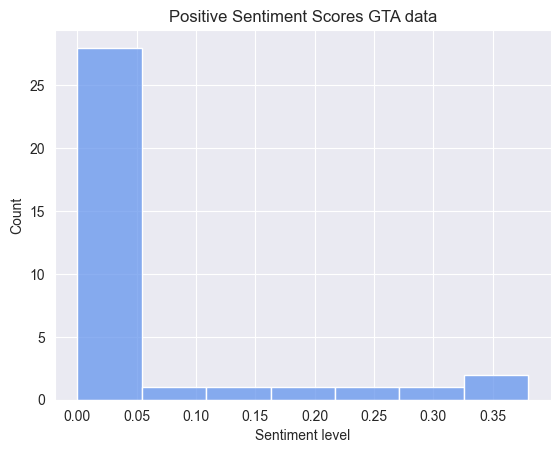

In [248]:
#os.system("pip install seaborn")
#os.system("pip install matplotlib")

# packages used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#pokemon_data["title_sentiment_pos"] = pd.to_numeric(pokemon_data["title_sentiment_pos"], errors = "coerce")
sns.histplot(pokemon_data["title_sentiment_pos"], color = "cornflowerblue").set(title = "Positive Sentiment Scores GTA data", xlabel = "Sentiment level")
# save the plot as png
plt.savefig("sentiment_level_pos.png")

## Word Clouds

In [249]:
#os.system("pip install wordcloud")
#os.system("pip install PIL")

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

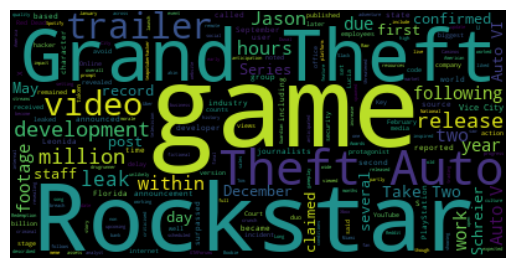

In [250]:
# use the data that we got from wikipedia
wordcloud_pokemon = WordCloud().generate(pokemon_text_whole)

plt.imshow(wordcloud_pokemon, interpolation = "bilinear")
plt.axis("off")
plt.savefig("wordcloud.png")
plt.show()

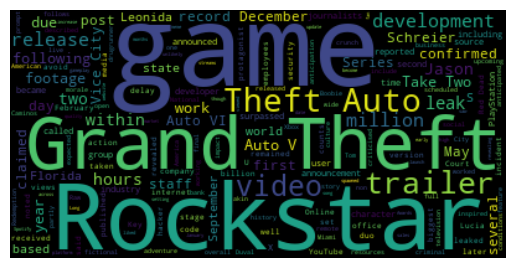

In [251]:
# ok, we get it, its about Pokémon
pokemon_text_trimmed = pokemon_text_whole.replace("Pokémon", "")
pokemon_text_trimmed = pokemon_text_trimmed.replace("Pokemon", "")


# create wordcloud
wordcloud_pokemon_trimmed = WordCloud().generate(pokemon_text_trimmed)

plt.imshow(wordcloud_pokemon_trimmed, interpolation = "bilinear")
plt.axis("off")
plt.savefig("wordcloud_2.png")
plt.show()

Methods like this can be used on any kind of text, which means also the descriptions we extracted before.